 # **Building a predictive model for customer churn**

### **Data Information**
* The data is related with direct marketing campaigns of a Portuguese banking institution.<br>

* The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

* The classification goal is to predict if the client will subscribe a term deposit.

### Attribute Information
* age (numeric)
* job : type of job (categorical: admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")
* related with the last contact of the current campaign:

* contact: contact communication type (categorical: "unknown","telephone","cellular")
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)
### other attributes:

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
### Output variable (desired target):

* y - has the client subscribed a term deposit? (binary: "yes","no")

# # **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings

<module 'warnings' from 'F:\\Prodigy_Infotech_Task2\\env\\lib\\warnings.py'>

In [2]:
bank = pd.read_csv("bank+marketing/bank/bank.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.shape

(4521, 17)

Initially we have 4521 rows and 17 columns

In [4]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


We have 7 features of int value attributes and 10 of object data types

In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No Null values in given dataset

In [8]:
bank.duplicated().sum()

0

No duplicate values in given dataset

In [9]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [10]:
100*bank['y'].value_counts()/len(bank['y'])

no     88.476001
yes    11.523999
Name: y, dtype: float64

 the term deposit data shows high variation 88.47% are no and 11.53% are yes. Data is highly imbalanced, ratio = 88:11. So we'll analyse the data with other features while taking the target values separately to get some insights.

We'll copy the data in another dataframe to avoid data loss of orignal data. 

In [11]:
churn = bank.copy()

In [12]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# **Data Cleaning**

We can drop 'day' & 'month' columns as 'pdays' gives the number of days that passed by after the client was last contacted from a previous campaign

In [13]:
churn.drop(["day","month"],axis =1, inplace = True)

There are many unknown entries we need to replace them as null/Nan

In [14]:
for i in churn.columns:
    churn[i] = np.where(churn[i] == "unknown", np.nan, churn[i])
churn.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [15]:
(3705/churn.poutcome.shape[0])*100

81.95089581950896

After replacing unknown values as null we find 'poutcome' has 3705 null entries i.e. about 81.9% null values, this feature is of no need we can simply drop it.

In [16]:
(1324/churn.contact.shape[0])*100

29.285556292855563

Similarly it doesnt matter if 'contact' was through cellular or telephone it doesnt affect the target variable, so we can drop this feature

In [17]:
churn.drop("poutcome", inplace = True, axis = 1)

In [18]:
churn.drop("contact", inplace = True, axis = 1)

# **Data Pre-processing**

As 'job' & 'education' has lower null values we'll fill  them using fillna method instead of dropping

In [19]:
churn["job"].fillna(method = "ffill",inplace=True)

In [20]:
churn["education"].fillna(method = "ffill",inplace= True)

Now we need to convert all categorical data to numerical data. This will allow us to perform calculations on our data

I decided to replace yes and no as 1 & 0 respectively, by defining  a map function including the target variable

In [21]:
varlist=['default','housing','loan','y']

In [22]:
def binary_map(q):
    return q.map({'yes':1,'no':0})

In [23]:
churn[varlist]=churn[varlist].apply(binary_map)

In [24]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0


# **One Hot Encoder**

 Now I dont think of using label encoding for the features 'job', 'marital' & 'education'  as it is only recommended for target variable instead we can use the One Hot Encoder  and dummy variables

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
one = OneHotEncoder()
churn[list(churn["job"].unique())] = one.fit_transform(churn[["job"]]).A

In [27]:
churn.drop("job",axis = 1, inplace = True)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
edu=pd.get_dummies(churn['education'])
edu

,primary,secondary,tertiary
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,0,1
4518,0,1,0
4519,0,1,0


In [29]:
edu=pd.get_dummies(churn['education'],drop_first=True)

we can drop the primary column as it can be predicted with the help of other dummy variables

In [30]:
status=pd.get_dummies(churn['marital'])

In [31]:
status

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


In [32]:
status=pd.get_dummies(churn['marital'],drop_first=True)

In [33]:
status

,married,single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
4516,1,0
4517,1,0
4518,1,0
4519,1,0


In [34]:
churn=pd.concat([churn,edu,status],axis=1)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [35]:
churn.drop("marital",axis = 1, inplace = True)
churn.drop("education",axis = 1, inplace = True)
churn

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


# **Univariate analysis**

In [36]:
churn_d = churn.copy()

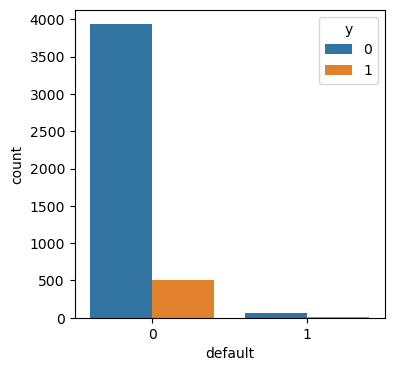

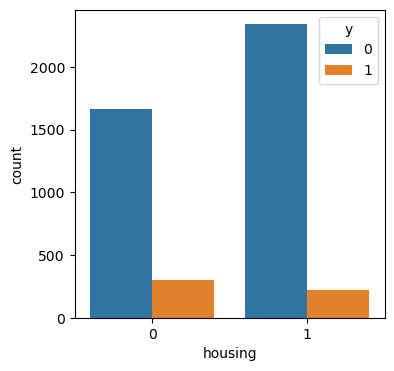

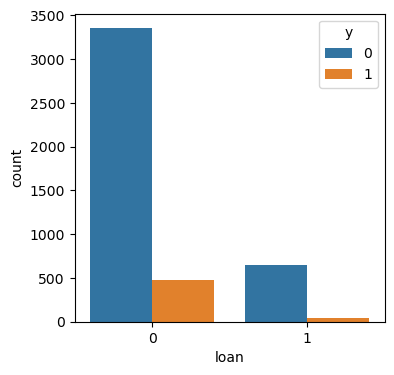

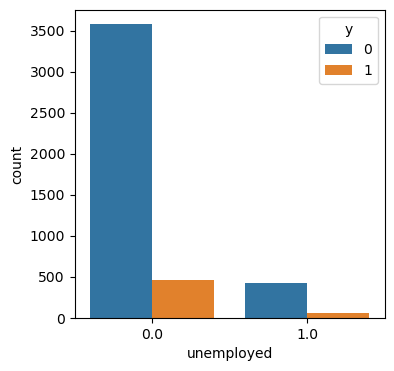

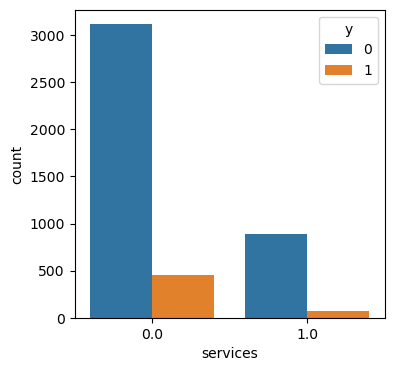

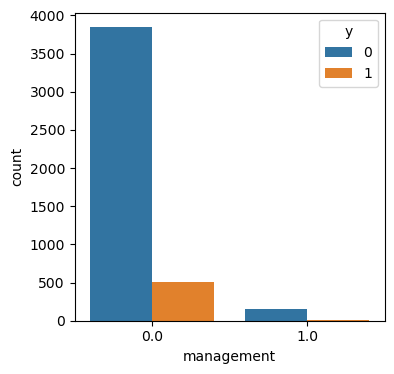

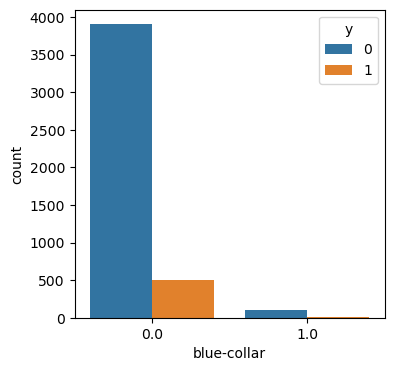

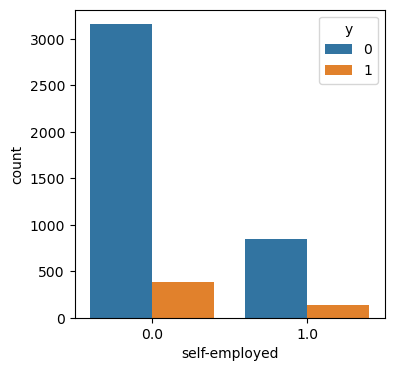

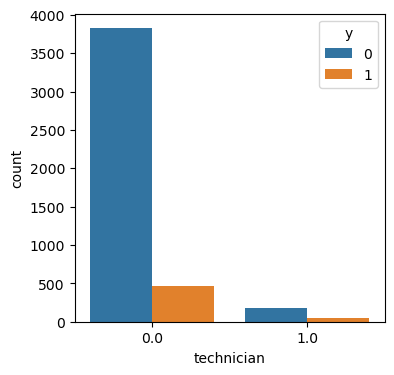

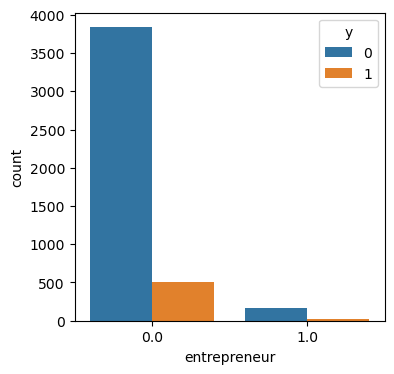

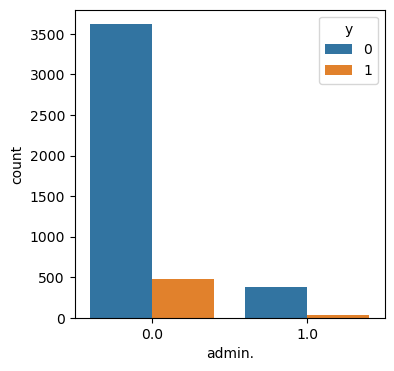

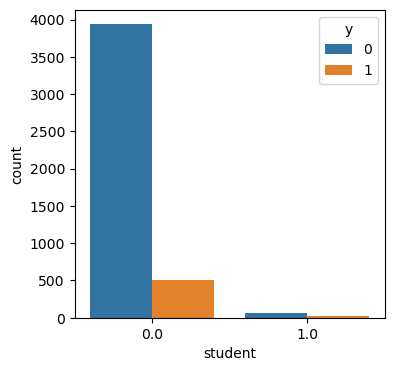

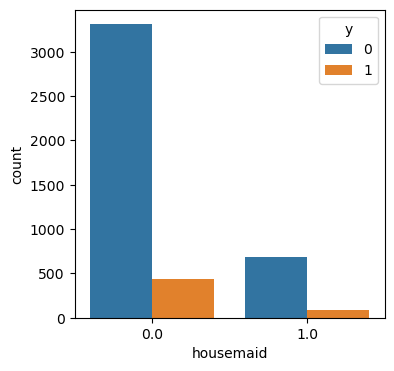

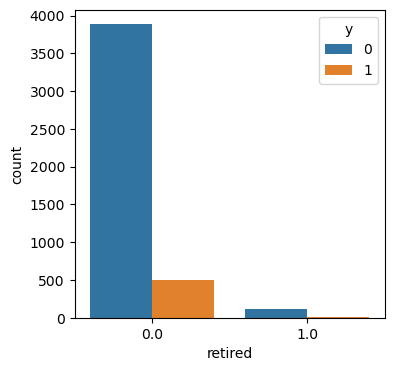

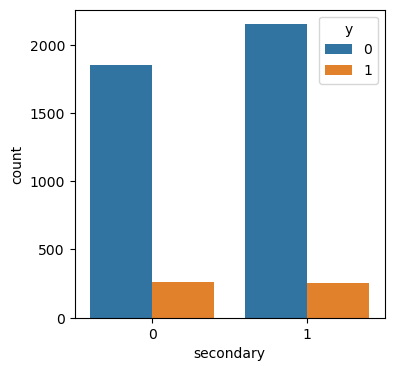

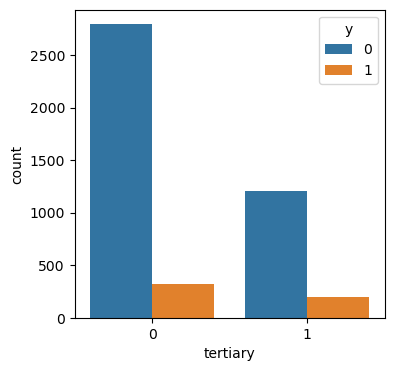

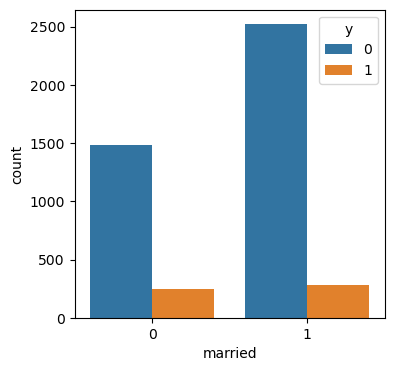

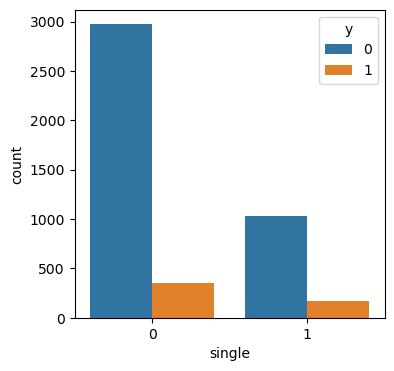

In [37]:
for i,predictor in enumerate(churn_d.drop(columns=['y','age','campaign','previous', 'balance', 'duration','pdays'])):
#     plt.figure(i)
    plt.figure(figsize=(4, 4))
    sns.countplot(data=churn_d, x=predictor, hue='y')

<Axes: >

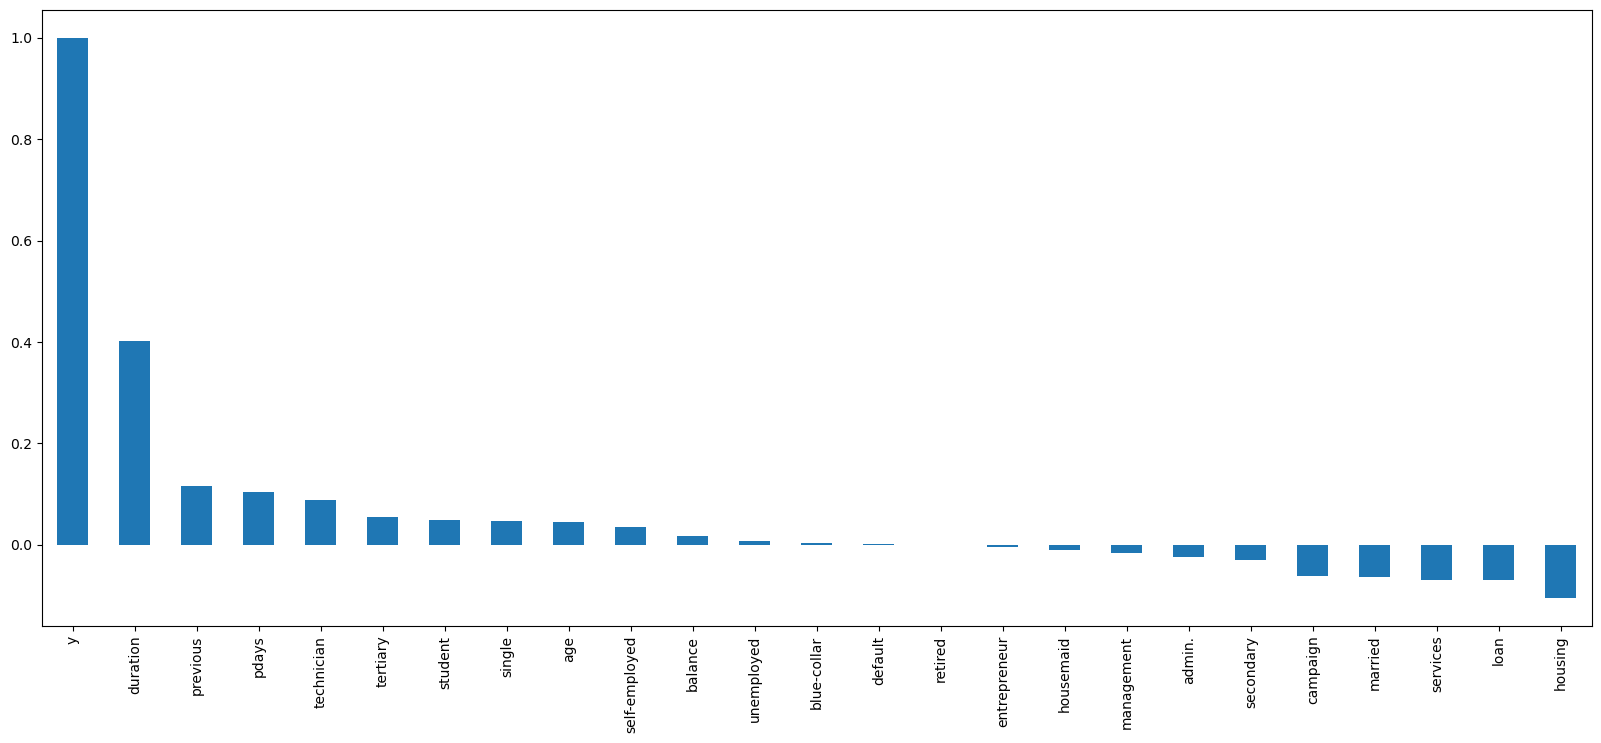

In [38]:
plt.figure(figsize=(20,8))
churn_d.corr()['y'].sort_values(ascending = False).plot(kind='bar')

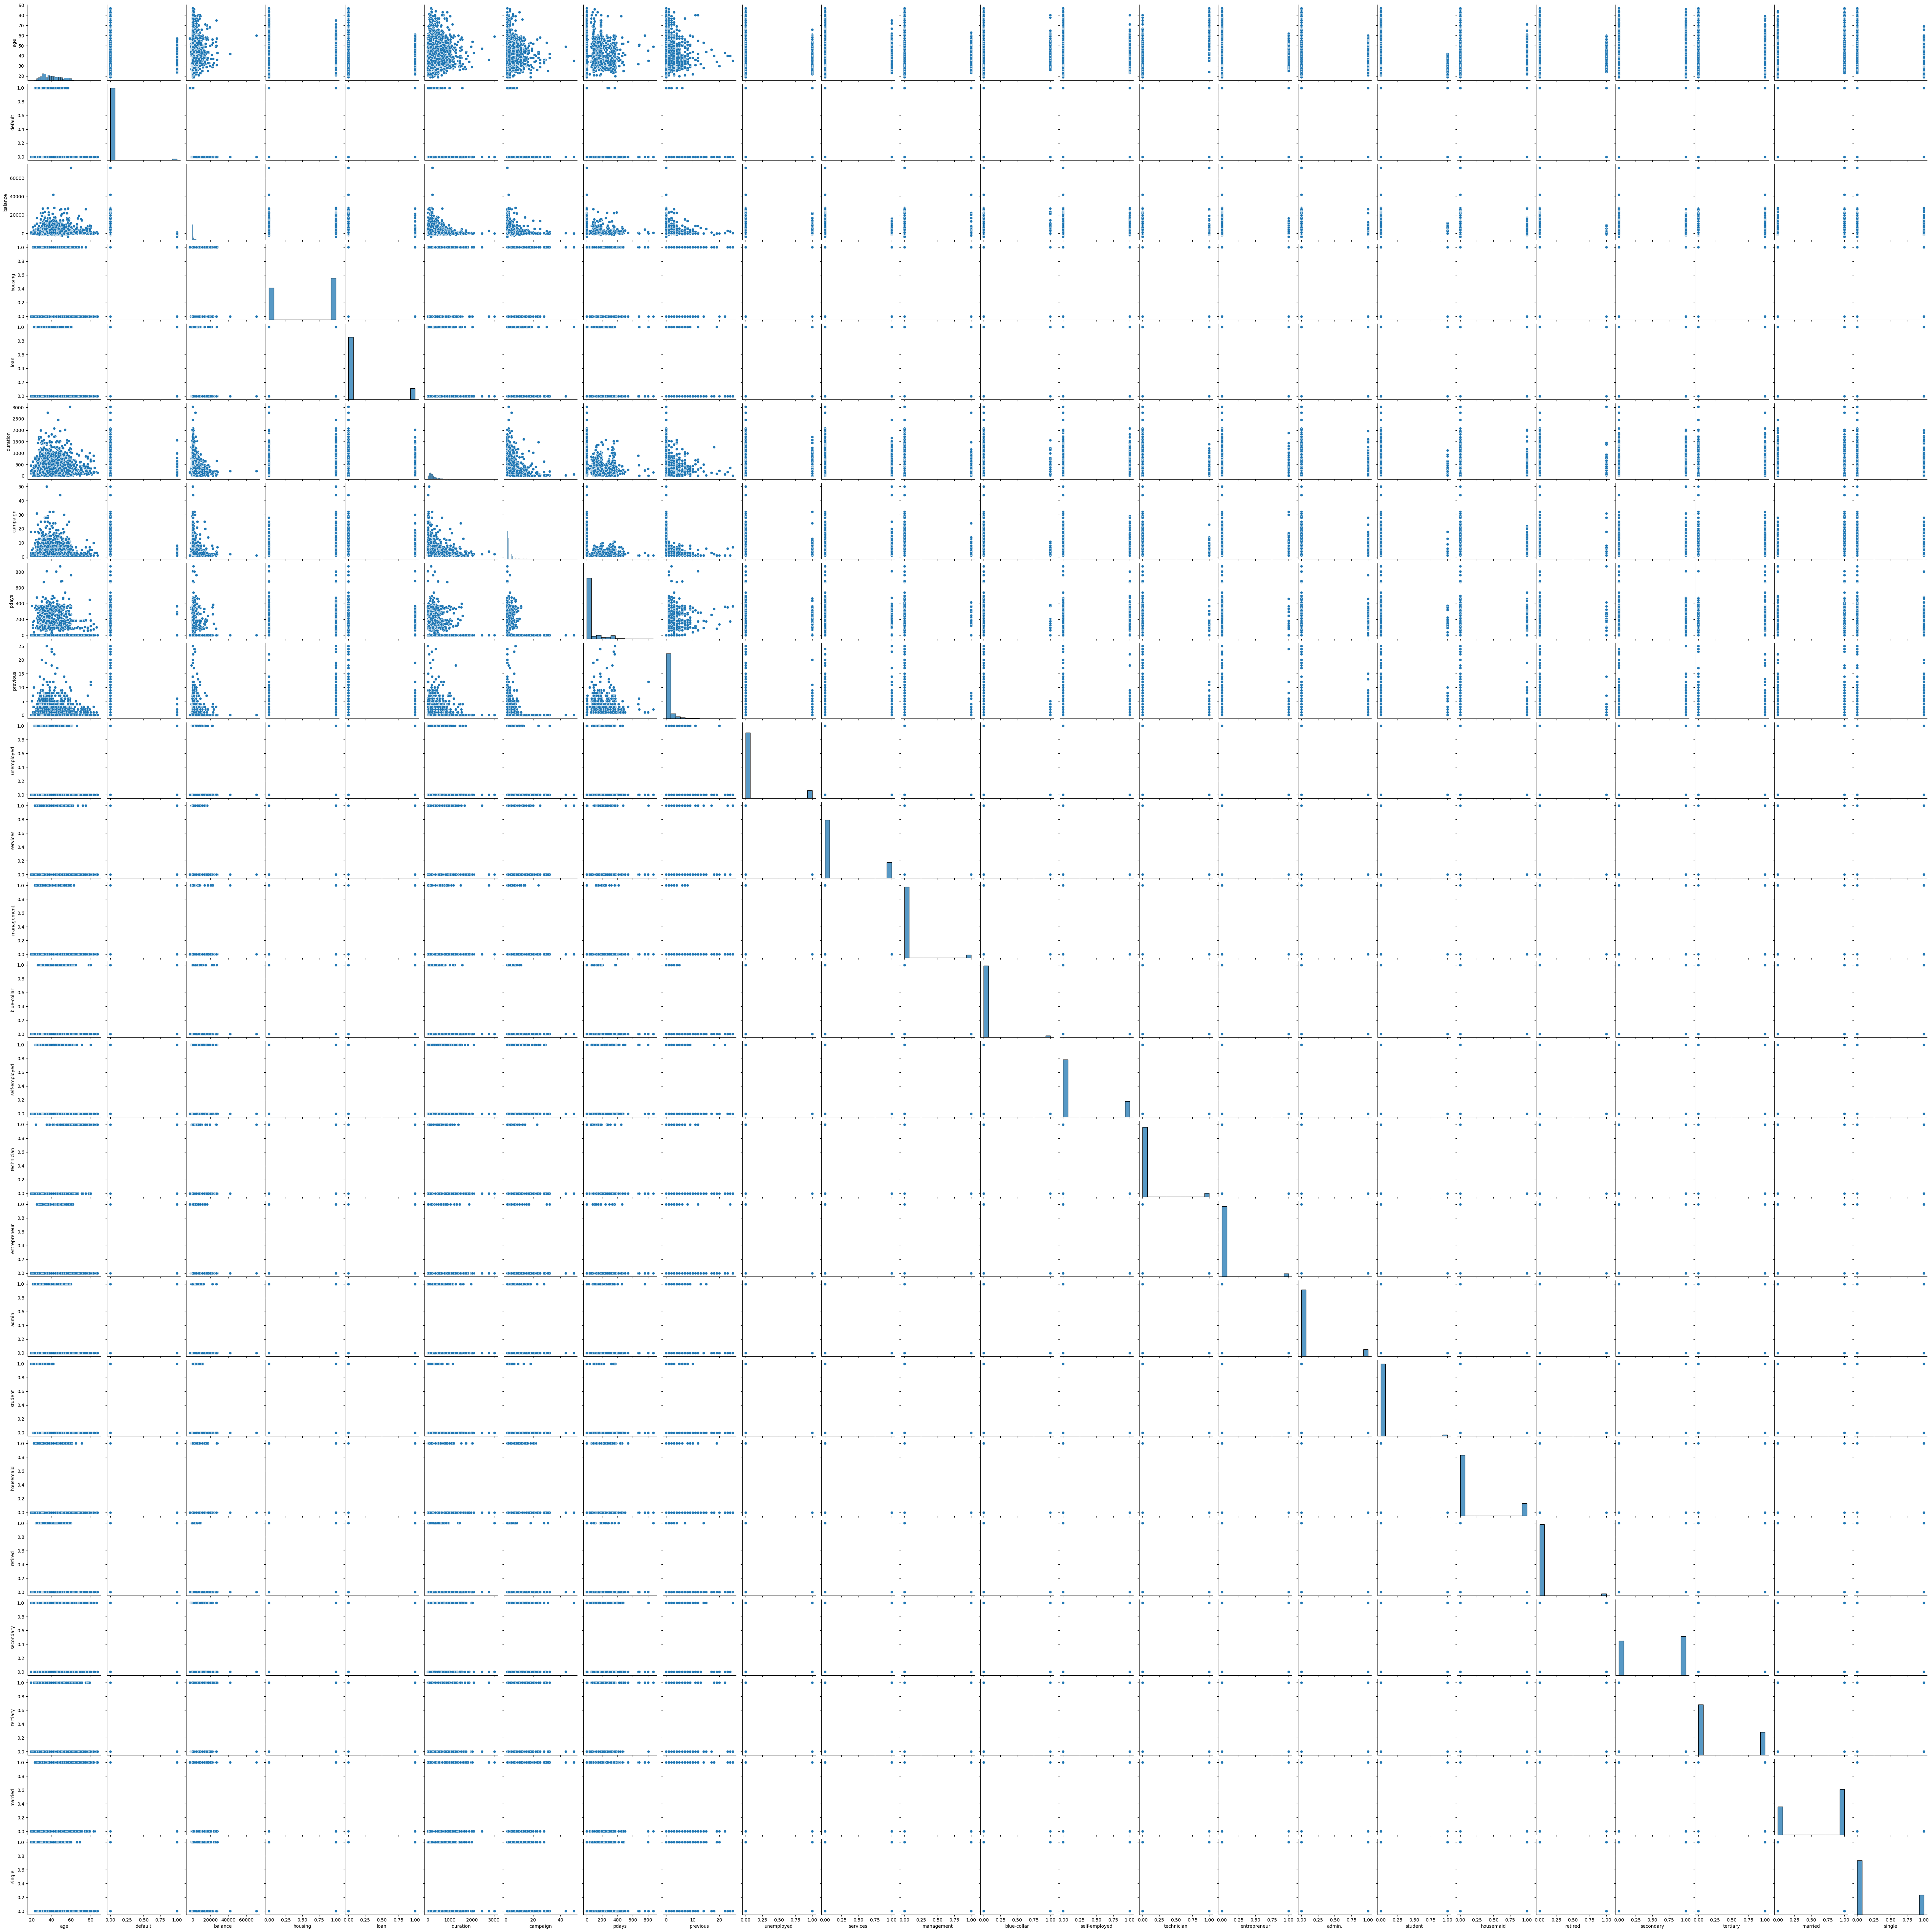

In [39]:
sns.pairplot(data = churn_d.drop("y",axis = 1))

**Heatmap to gain insights about correlation**

<Axes: >

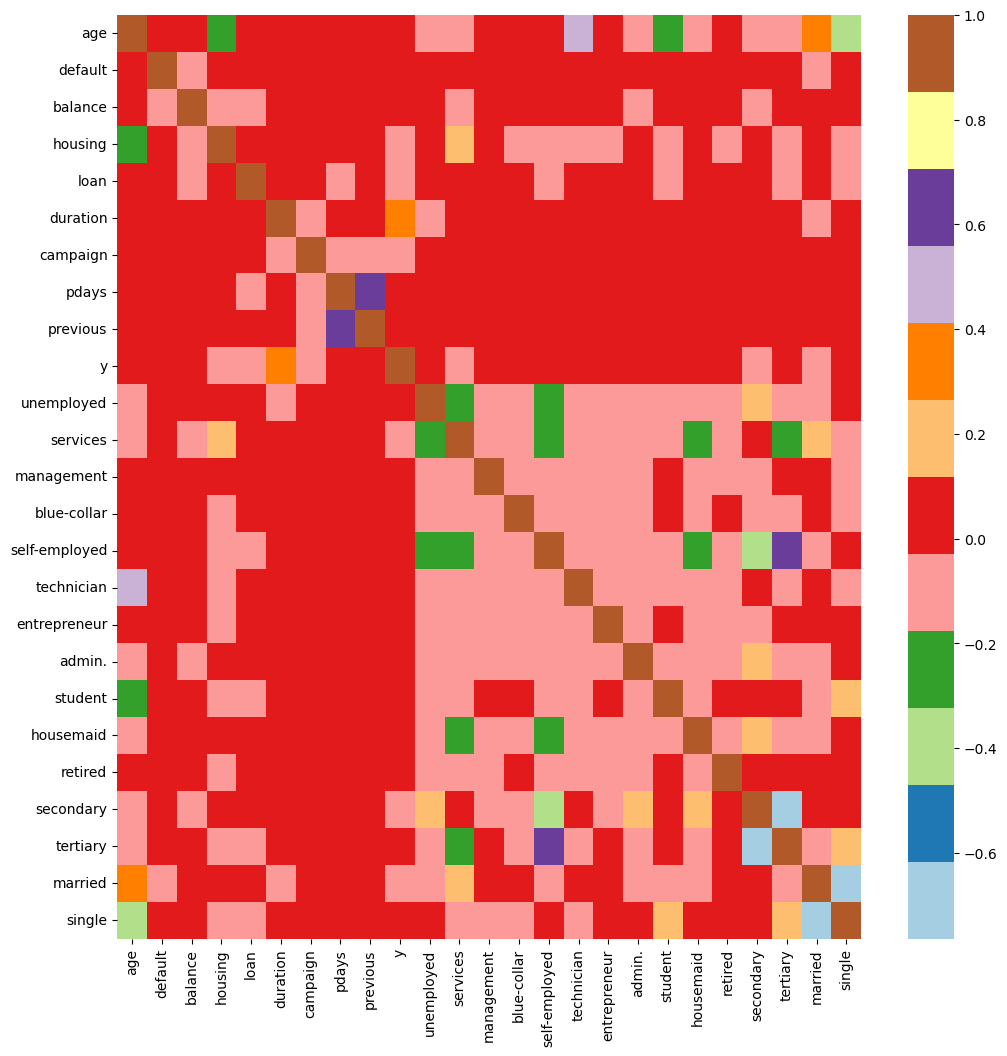

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_d.corr(), cmap="Paired")

In [41]:
churn_d.to_csv('churn_model.csv')

# # **Model Building**

In [42]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from imblearn.combine import SMOTEENN

In [43]:
df=pd.read_csv("churn_model.csv")
df.head()

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [44]:
df=df.drop('Unnamed: 0',axis=1)

In [45]:
x=df.drop('y',axis=1)
x

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [46]:
y=df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

# # # **Decision Tree Classifier**

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
model_dt.score(x_test,y_test)

0.8983425414364641

In [51]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       816
           1       0.48      0.35      0.40        89

    accuracy                           0.90       905
   macro avg       0.70      0.65      0.67       905
weighted avg       0.89      0.90      0.89       905



In [52]:
print(metrics.confusion_matrix(y_test, y_pred))

[[782  34]
 [ 58  31]]


89.61% accuracy

As the data set were highly unbalanced, we will use upsampling in order to increase accuracy using SMOTEENN

In [53]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [54]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.20)

In [55]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [56]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8996627318718381
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       543
           1       0.93      0.88      0.91       643

    accuracy                           0.90      1186
   macro avg       0.90      0.90      0.90      1186
weighted avg       0.90      0.90      0.90      1186



In [57]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[499  44]
 [ 75 568]]


This method gave 92.13% accuracy, I also tried by changing the criterion to 'entropy' but it achieved 91.38% accuracy only which is less than 'gini' index method